In [1]:
import json
from collections import Counter
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_annotation_json(path):
    with open(path, 'r') as file:
        data = json.load(file)
        annotations = data.get("annotations", [])
        images = data.get("images", [])
        categories = data.get("categories", [])
    return annotations, images, categories

def get_size_category(area):
    if area < 2900:
        size = "S"
    elif area < 9500:
        size = "M"
    elif area < 31000:
        size = "L"
    else:
        size = "XL"
    return size

def get_stat_dict(dataset_a, dataset_b):
    dataset_a['annotations'], dataset_a['images'], dataset_a['categories'] = get_annotation_json(dataset_a['annotation_path'])
    dataset_b['annotations'], dataset_b['images'], dataset_b['categories'] = get_annotation_json(dataset_b['annotation_path'])

    state_dict = {
        dataset_a['name']: {item['name']: {'S': 0, 'M': 0, 'L': 0, 'XL': 0} for item in dataset_a['categories']},
        dataset_b['name']: {item['name']: {'S': 0, 'M': 0, 'L': 0, 'XL': 0} for item in dataset_b['categories']}
    }
    for dataset in [dataset_a, dataset_b]:
        for annotation in dataset['annotations']:
            image_id = annotation['image_id']
            class_id = annotation['category_id']
            class_name = next(item['name'] for item in dataset['categories'] if item['id'] == class_id)
            size = get_size_category(annotation['area'])

            state_dict[dataset['name']][class_name][size] += 1
    return state_dict

def get_frequency_plot(state_dict):
    class_names = list(state_dict[dataset_a['name']].keys())
    number_of_classes = len(class_names)
    sizes = ['S', 'M', 'L', 'XL']
    used_doc_categories = list(state_dict.keys())

    x = np.arange(len(class_names)) * 2
    bar_width = 0.4
    offset = bar_width/2

    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2'] # 4 for 4 size categories

    fig, ax = plt.subplots(figsize=(2.4*number_of_classes, 6))

    for j, dataset in enumerate(used_doc_categories):
        total_values_per_category = [sum(state_dict[dataset][cat].values()) for cat in class_names]

        bottom = np.zeros(len(class_names))
        for i, size in enumerate(sizes):
            values = [state_dict[dataset][cat][size] for cat in class_names]
            bars = ax.bar(x + j * bar_width - offset, values, bar_width, bottom=bottom, color=colors[i], label=f'{size}' if j == 0 and i == 0 else "")
            bottom += values

        percentages = [100 * total / sum(total_values_per_category) if sum(total_values_per_category) > 0 else 0
                       for total in total_values_per_category]
        for bar, percentage in zip(bars, percentages):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + ax.get_ylim()[1]*0.04, f'{percentage:.1f}%', ha='center', rotation=90, va='bottom', fontsize=12)

    #ax.set_xlabel('Classes with percentage class frequency value', fontsize=8)
    #ax.set_ylabel('Frequency', fontsize=10)
    #ax.set_title('Class Frequency', fontsize=8)
    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=18)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(top=ax.get_ylim()[1]*1.25)
    ax.legend(handles=[
        plt.Rectangle((0, 0), 1, 1, color=colors[0], label='S'),
        plt.Rectangle((0, 0), 1, 1, color=colors[1], label='M'),
        plt.Rectangle((0, 0), 1, 1, color=colors[2], label='L'),
        plt.Rectangle((0, 0), 1, 1, color=colors[3], label='XL')
    ], title="Sizes", loc="upper right", title_fontsize=18, fontsize=20)

    
    if list(state_dict.keys())[0] == "PLN-4":
        bbox_to_anchor=(0.7, 0.94)
    else:
        bbox_to_anchor=(0.1, 0.95)
    
    fig.legend(
        handles=[
            plt.Line2D([0], [0], color='black', label=f'Left {list(state_dict.keys())[0]}', linestyle='', marker='o'),
            plt.Line2D([0], [0], color='black', label=f'Left {list(state_dict.keys())[1]}', linestyle='', marker='o'),
        ],
        loc='upper center',
        bbox_to_anchor=bbox_to_anchor,
        fontsize=15
    )

    plt.tight_layout()
    plt.savefig(f"/home/stewes/source-free-domain-adaptive-document-layout-analysis/Visualizations/{list(state_dict.keys())[0]}_D{list(state_dict.keys())[1]}_Class_Frequency.svg", format="svg")
    plt.show()


{'PLN-4': {'text': {'S': 198503, 'M': 519024, 'L': 983535, 'XL': 723053},
  'title': {'S': 517369, 'M': 70067, 'L': 35766, 'XL': 3923},
  'table': {'S': 13, 'M': 513, 'L': 17161, 'XL': 84827},
  'figure': {'S': 555, 'M': 426, 'L': 7276, 'XL': 101035}},
 'DLN-4': {'text': {'S': 67113, 'M': 140992, 'L': 207604, 'XL': 223364},
  'title': {'S': 55607, 'M': 52456, 'L': 12568, 'XL': 2396},
  'table': {'S': 3, 'M': 367, 'L': 2435, 'XL': 27265},
  'figure': {'S': 3107, 'M': 3135, 'L': 6792, 'XL': 26633}}}

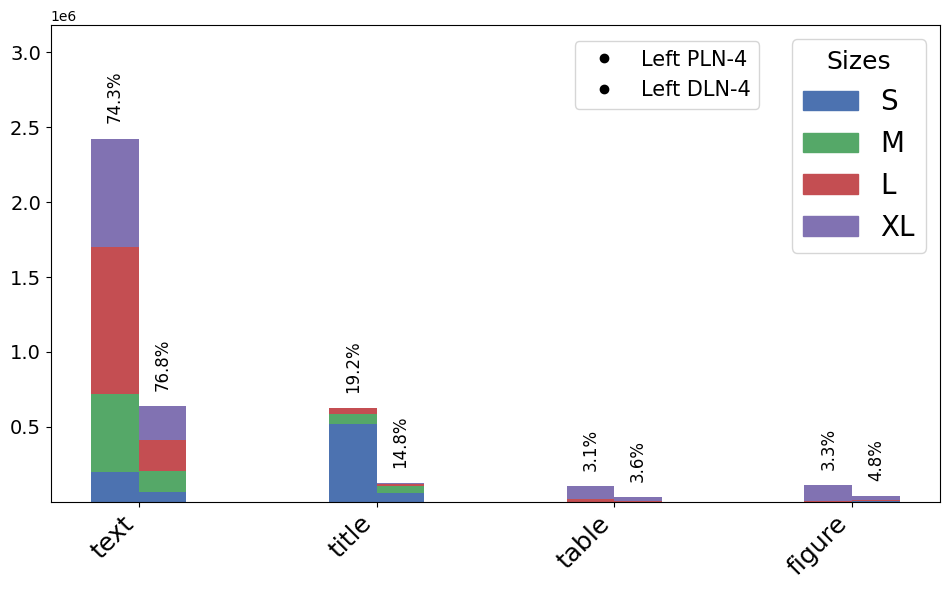

In [3]:
split = "train"

dataset_a = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/PLN_with_4_Classes_{split}.json",
    'name': "PLN-4"

}
dataset_b = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/DLN_with_4_Classes_{split}.json",
    'name': "DLN-4"
}

state_dict = get_stat_dict(dataset_a, dataset_b)
display(state_dict)
get_frequency_plot(state_dict)

{'DLN-10': {'Caption': {'S': 4129, 'M': 8098, 'L': 3958, 'XL': 3033},
  'Footnote': {'S': 1896, 'M': 1734, 'L': 1490, 'XL': 499},
  'Formula': {'S': 339, 'M': 4686, 'L': 11893, 'XL': 4249},
  'Page-footer': {'S': 51657, 'M': 8770, 'L': 818, 'XL': 68},
  'Page-header': {'S': 31777, 'M': 11971, 'L': 3920, 'XL': 305},
  'Picture': {'S': 3107, 'M': 3135, 'L': 6792, 'XL': 26633},
  'Section-header': {'S': 54875, 'M': 50623, 'L': 11352, 'XL': 1740},
  'Table': {'S': 3, 'M': 367, 'L': 2435, 'XL': 27265},
  'Text': {'S': 39474, 'M': 72362, 'L': 131948, 'XL': 187467},
  'Title': {'S': 732, 'M': 1833, 'L': 1216, 'XL': 656}},
 'M6Doc-10': {'Caption': {'S': 1212, 'M': 890, 'L': 1194, 'XL': 499},
  'Footnote': {'S': 12, 'M': 77, 'L': 117, 'XL': 89},
  'Formula': {'S': 8583, 'M': 3254, 'L': 1058, 'XL': 195},
  'Page-footer': {'S': 664, 'M': 1101, 'L': 189, 'XL': 30},
  'Page-header': {'S': 78, 'M': 119, 'L': 130, 'XL': 125},
  'Picture': {'S': 433, 'M': 524, 'L': 1189, 'XL': 5798},
  'Section-header

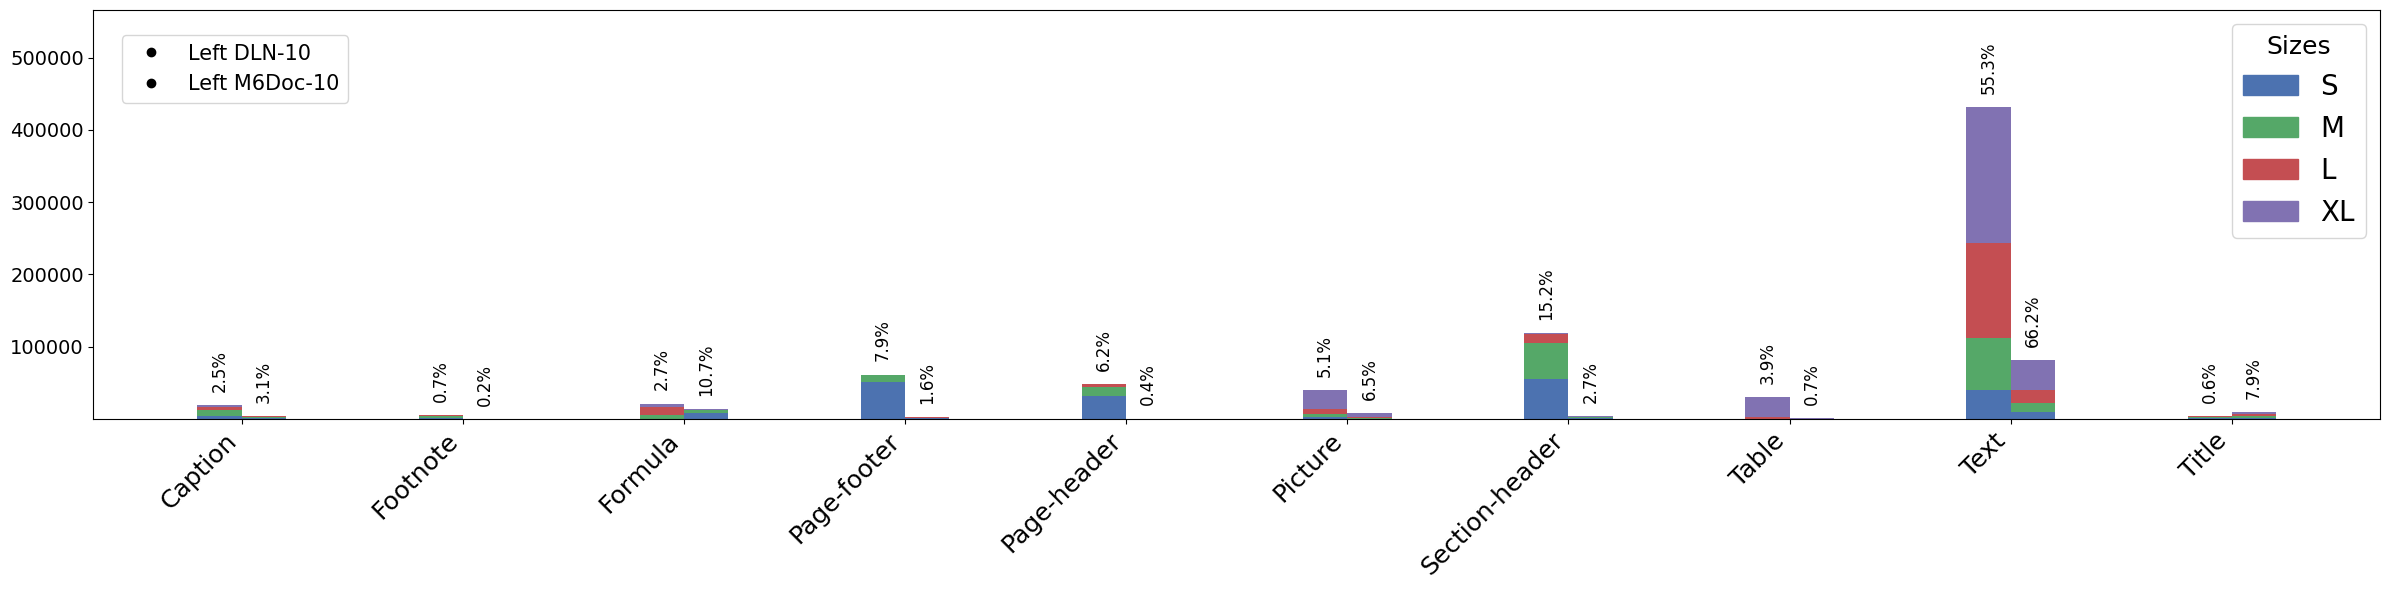

In [4]:
split = "train"

dataset_a = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/DLN_with_10_Classes_{split}.json",
    'name': "DLN-10"
}
dataset_b = {
    'annotation_path': f"/cvhci/temp/stewes/converted_coco_annotation_files/M6Doc_with_10_Classes_{split}.json",
    'name': "M6Doc-10"
}

state_dict = get_stat_dict(dataset_a, dataset_b)
display(state_dict)
get_frequency_plot(state_dict)